In [1]:
from rewann import Environment
from rewann.environment.util import load_indiv_metrics
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
env = Environment('../data/iris_long')

In [3]:
dfs = list()
max_front = 0
with env.open_data('r'):
    for i in list(np.arange(0,2000,10) + 10):
        df = load_indiv_metrics(env, int(i))
        df.index = df.index.astype(np.int)
        df.iloc[::-1]
        dfs.append(df)
        max_front = max(df['front'].max(), max_front)

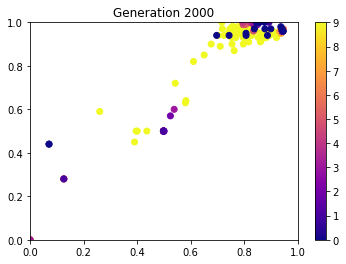

In [4]:
x_col = 'kappa.mean'
y_col = 'kappa.max'
c_col = 'front'
#s_col = 'f'

df = dfs[0]
x = df[x_col]
y = df[y_col]
c = df[c_col]

scat = plt.scatter(x, y, c=c, cmap="plasma", vmin=0, vmax=9)


plt.xlim((0,1))
plt.ylim((0, 1))

plt.colorbar()

def animate(i):
    i = i if i < len(dfs) else len(dfs)-1
    df = dfs[i]
    x = df[x_col][::-1]
    y = df[y_col][::-1]
    c = df[c_col][::-1]
    
    c = np.where(c < 9, c, 9)
    
    #s = df[s_col]*3 + 5
    scat.set_offsets(np.vstack([x,y]).T)
    scat.set_array(c)
    #scat.set_sizes(s)
    gen = 10 + i*10
    plt.title(f'Generation {gen}')
    return (scat,)



def init():
    return animate(0)
    
anim = animation.FuncAnimation(plt.gcf(), animate, init_func=init,
                               frames=len(dfs)+10, interval=500, blit=True)
HTML(anim.to_html5_video())

In [5]:
a = np.arange(4)
np.vstack([a,a]).T

array([[0, 0],
       [1, 1],
       [2, 2],
       [3, 3]])

In [6]:
np.where(df['front'] < 10, df['front'], 10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.])

In [ ]:
x_col = 'kappa.mean'
y_col = 'kappa.max'

plt.gcf().set_size_inches(18.5, 10.5)


lines = list()
for i in range(10):
    l, = plt.plot([], [])
    lines.append(l)


plt.xlim((0,1))
plt.ylim((0, 1))


def animate(i):
    i = i if i < len(dfs) else len(dfs)-1
    df = dfs[i]
    
    df = df.sort_values(by=[x_col, x_col])
    
    x = df[x_col]
    y = df[y_col]
    
    #fronts = np.where(df['front'] < 9, df['front'], 9)
    
    
    for f, l in enumerate(lines):
        f_indivs = df['front'] == f
        
        l.set_data(x[f_indivs], y[f_indivs])
        
    gen = 10 + i*10
        
    plt.title(f'Generation {gen}')
    return lines



def init():
    return animate(0)
    
anim = animation.FuncAnimation(plt.gcf(), animate, init_func=init,
                               frames=len(dfs)+10, interval=500, blit=True)
HTML(anim.to_html5_video())